### 講義での利用方法（＊＊重要＊＊）
講義では、とくに指定のない限り（動作する） Python プログラム形式 (.py)として提出すること。
実際には、セルで動作を確認したプログラムスクリプトをクリップボードにコピー、Python プログラムエディタにペーストする
という方法が現実的と思われる。  
もちろん自身が普段使い慣れているエディタを利用してもかまわない。

### 提出の前に（＊＊重要＊＊）
1. プログラム (.py)が動作するか、コマンドシェルから確認すること。
1. ファイル名を間違えないこと。教員は課題評価の際にファイルを漁ったりしない。

## 課題 7.  可視化（その１）

`btc.ipynb`　などを参考に、公開されている 1 次元の数値列データをプロットするプログラムを作成せよ。

プログラムファイルは `myplot.py` として、
可視化内容の説明・考察を（プログラムの説明ではない）を Markdown 形式で `mypolot.md` に記述、教材配布 GitHub レポジトリにアップロードすること。

評価基準は、例えば以下が挙げられる:
- 利用したプロットオプション
- データ形式の困難さ、たとえばネ申エクセル度
- 秀逸なテーマには加点する

以下のセルを修正してもよい。

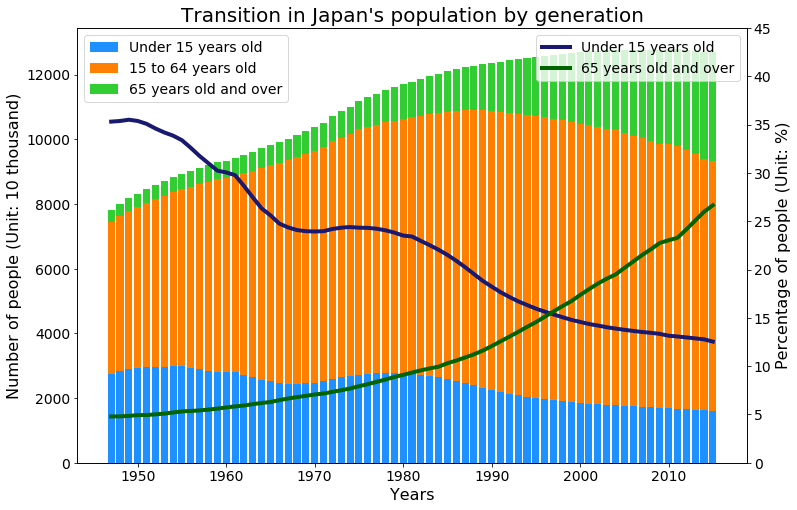

In [130]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
ax2 = ax1.twinx()

df = pd.read_csv("population_ratio.csv", index_col = 0)
bottom = np.zeros(len(df.index))

labels = ["Under 15 years old","15 to 64 years old", "65 years old and over"]
colors = ["dodgerblue","#ff7f00","limegreen"]

for i in range(3):
    ax1.bar(df.index, df.iloc[:,i],width=0.8,align='center', zorder=10-0.1*i, bottom=bottom, label=labels[i],
           color=colors[i])
    bottom += df.iloc[:,i]

ax1.set_title("Transition in Japan's population by generation",fontsize=20)
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Years", fontsize=16)
ax1.set_ylabel("Number of people (Unit: 10 thousand)", fontsize=16)

ax2.plot(df["15歳未満割合"],color="midnightblue", linewidth=4, label="Under 15 years old")
ax2.plot(df["高齢者割合"],color="darkgreen", linewidth=4, label="65 years old and over")
ax2.set_ylim(0,45)
ax2.legend(fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Percentage of people (Unit: %)", fontsize=16)
plt.savefig("myplot.png")

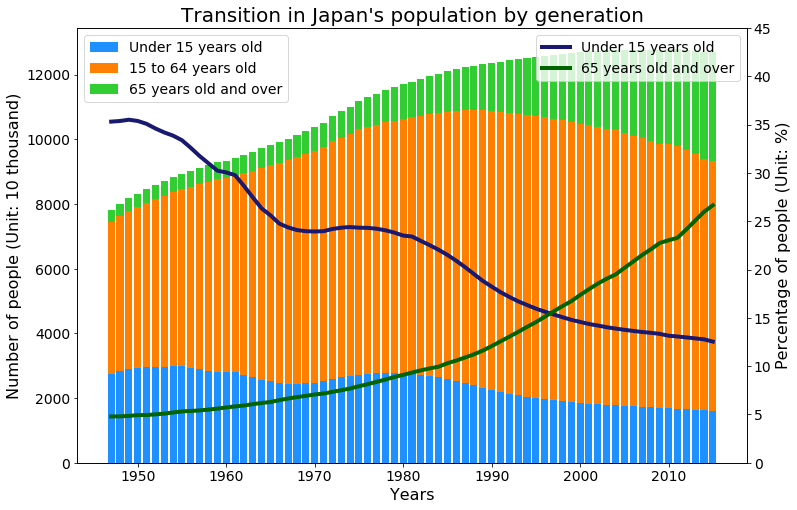

In [127]:
def myplot():
    import numpy as np
    import pandas as pd
    import datetime
    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots(1,1, figsize=(12,8))
    ax2 = ax1.twinx()

    df = pd.read_csv("population_ratio.csv", index_col = 0)
    bottom = np.zeros(len(df.index))

    labels = ["Under 15 years old","15 to 64 years old", "65 years old and over"]
    colors = ["dodgerblue","#ff7f00","limegreen"]

    for i in range(3):
        ax1.bar(df.index, df.iloc[:,i],width=0.8,align='center', zorder=10-0.1*i, bottom=bottom, label=labels[i],
               color=colors[i])
        bottom += df.iloc[:,i]

    ax1.set_title("Transition in Japan's population by generation",fontsize=20)
    ax1.legend(fontsize=14)
    ax1.tick_params(labelsize=14)
    ax1.set_xlabel("Years", fontsize=16)
    ax1.set_ylabel("Number of people (Unit: 10 thousand)", fontsize=16)

    ax2.plot(df["15歳未満割合"],color="midnightblue", linewidth=4, label="Under 15 years old")
    ax2.plot(df["高齢者割合"],color="darkgreen", linewidth=4, label="65 years old and over")
    ax2.set_ylim(0,45)
    ax2.legend(fontsize=14)
    ax2.tick_params(labelsize=14)
    ax2.set_ylabel("Percentage of people (Unit: %)", fontsize=16)
    plt.show()
    return

myplot()

## 課題 8.  可視化（その２）

`cartopy.ipynb`　などを参考に、公開されている情報と地理情報を組み合わせ、可視化するプログラムを作成せよ。

プログラムファイルは `mymap.py` として、
可視化内容の説明・考察を（プログラムの説明ではない）を Markdown 形式で `mymap.md` に記述、教材配布 GitHub レポジトリにアップロードすること。

以下のセルを修正してもよい。

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

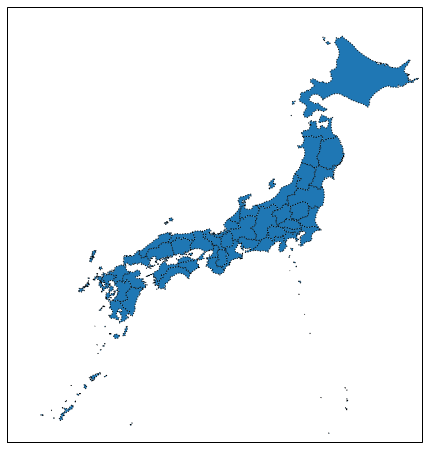

In [140]:
# 10m 解像度のデータ読み込み
shpfilename = shapereader.natural_earth(resolution='10m',
                                        category='cultural',
                                        name='admin_1_states_provinces')

# 国内の都道府県のみ取得
reader = shapereader.Reader(shpfilename)
provinces = []
for province in reader.records():
    if(province.attributes["admin"] == "Japan"):
        provinces.append(province)

# Figure, Subplot 生成
plt.figure(figsize=[8,8])
ax = plt.axes(projection=ccrs.PlateCarree())

# 都道府県のパッチで埋めていく
for province in provinces:
    geometry = province.geometry
    ax.add_geometries(geometry, ccrs.PlateCarree(), edgecolor="black", linestyle=":")

# 日本以外を含む海岸線を描画
# ax.coastlines(resolution='10m')

# 描画範囲を緯度、経度で指定
ax.set_extent([125, 146, 25, 47])
plt.show()

In [162]:
provinces[30].attributes["name_local"] = "静岡県"
provinces[30].attributes["name_local"]

'静岡県'

In [163]:
for province in provinces:
    print(province.attributes["name"], province.attributes["name_local"])

Kagoshima 鹿児島県
Ōita 大分県
Fukuoka 福岡県
Saga 佐賀県
Nagasaki 長崎県
Kumamoto 熊本県
Miyazaki 宮崎県
Tokushima 徳島県
Kagawa 香川県
Ehime 愛媛県
Kōchi 高知県
Shimane 島根県
Yamaguchi 山口県
Tottori 鳥取県
Hyōgo 兵庫県
Kyōto 京都府
Fukui 福井県
Ishikawa 石川県
Toyama 富山県
Niigata 新潟県
Yamagata 山形県
Akita 秋田県
Aomori 青森県
Iwate 岩手県
Miyagi 宮城県
Fukushima 福島県
Ibaraki 茨城県
Chiba 千葉県
Tokyo 東京都
Kanagawa 神奈川県
Shizuoka 静岡県
Aichi 愛知県
Mie 三重県
Wakayama 和歌山県
Ōsaka 大阪府
Okayama 岡山県
Hiroshima 広島県
Hokkaidō 北海道
Okinawa 沖縄県
Gunma 群馬県
Nagano 長野県
Tochigi 栃木県
Gifu 岐阜県
Shiga 滋賀県
Saitama 埼玉県
Yamanashi 山梨県
Nara 奈良県


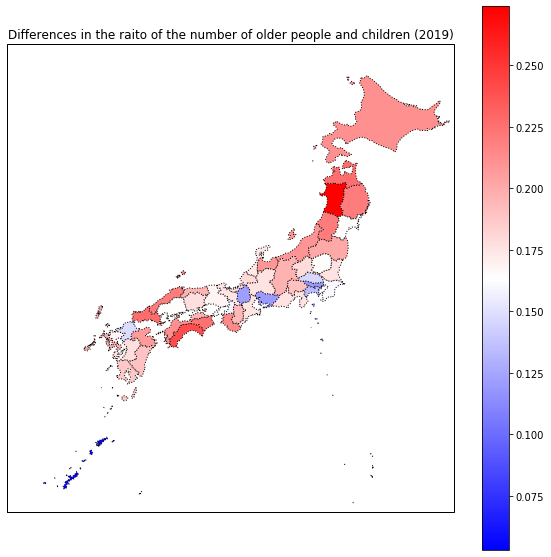

In [241]:
df = pd.read_csv("population_ratio_prefecture.csv", usecols=[1,2,3,4,5], index_col=0)
df.index.name="都道府県名"

shpfilename = shapereader.natural_earth(resolution='10m',
                                        category='cultural',
                                        name='admin_1_states_provinces')

reader = shapereader.Reader(shpfilename)

provinces = []
for province in reader.records():
    if(province.attributes["admin"] == "Japan"):
        provinces.append(province)
provinces[30].attributes["name_local"] = "静岡県" 

plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.PlateCarree())

cmap = plt.cm.bwr
cnorm = max(df["difference"]) - min(df["difference"])
coff = min(df["difference"])

for province in provinces:
    geometry = province.geometry
    color = cmap((df["difference"][province.attributes["name_local"]] - coff) / cnorm)
    ax.add_geometries(geometry, ccrs.PlateCarree(), edgecolor="black", linestyle=":",
                        facecolor=color)
    
ax.set_title("Differences in the raito of the number of older people and children (2019)")
ax.set_extent([125, 146, 25, 47])
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize((cnorm+coff)/100,coff/100))
sm._A = []
plt.colorbar(sm,ax=ax)
plt.savefig("mymap.png")
plt.show()

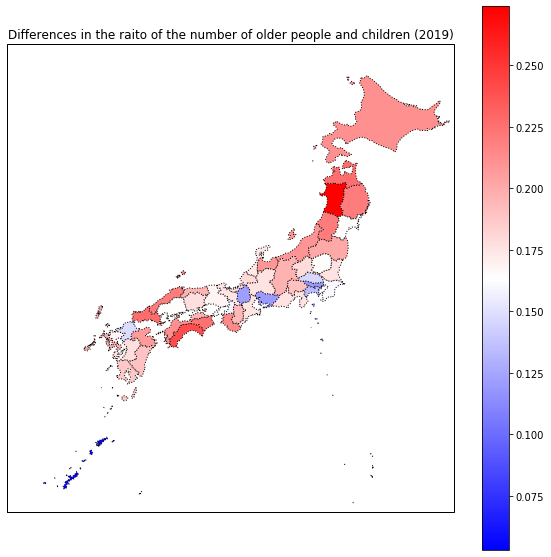

In [240]:
def mymap():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import cartopy.io.shapereader as shapereader
    
    df = pd.read_csv("population_ratio_prefecture.csv", usecols=[1,2,3,4,5], index_col=0)
    df.index.name="都道府県名"

    shpfilename = shapereader.natural_earth(resolution='10m',
                                            category='cultural',
                                            name='admin_1_states_provinces')

    reader = shapereader.Reader(shpfilename)

    provinces = []
    for province in reader.records():
        if(province.attributes["admin"] == "Japan"):
            provinces.append(province)
    provinces[30].attributes["name_local"] = "静岡県" 

    plt.figure(figsize=[10,10])
    ax = plt.axes(projection=ccrs.PlateCarree())

    cmap = plt.cm.bwr
    cnorm = max(df["difference"]) - min(df["difference"])
    coff = min(df["difference"])

    for province in provinces:
        geometry = province.geometry
        color = cmap((df["difference"][province.attributes["name_local"]] - coff) / cnorm)
        ax.add_geometries(geometry, ccrs.PlateCarree(), edgecolor="black", linestyle=":",
                            facecolor=color)

    ax.set_title("Differences in the raito of the number of older people and children (2019)")
    ax.set_extent([125, 146, 25, 47])
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize((cnorm+coff)/100,coff/100))
    sm._A = []
    plt.colorbar(sm,ax=ax)

    plt.show()
    return

mymap()